# Loading and Cleaning Datasets

In [51]:
import pandas as pd
import numpy as np
import spacy as sp
import re
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

If using IDE, Run 
```
python -m spacy download en_core_web_sm
```
in the bash to install the english spacy pipline

## Official Datasets

### Data and Exploration

In [49]:
df = pd.read_json("../Datasets/Official/train.json")
df

,document,full_text,tokens,trailing_whitespace,labels
0,7,Design Thinking for innovation reflexion-Avril...,"[Design, Thinking, for, innovation, reflexion,...","[True, True, True, True, False, False, True, F...","[O, O, O, O, O, O, O, O, O, B-NAME_STUDENT, I-..."
1,10,Diego Estrada\n\nDesign Thinking Assignment\n\...,"[Diego, Estrada, \n\n, Design, Thinking, Assig...","[True, False, False, True, True, False, False,...","[B-NAME_STUDENT, I-NAME_STUDENT, O, O, O, O, O..."
2,16,Reporting process\n\nby Gilberto Gamboa\n\nCha...,"[Reporting, process, \n\n, by, Gilberto, Gambo...","[True, False, False, True, True, False, False,...","[O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT, O..."
3,20,Design Thinking for Innovation\n\nSindy Samaca...,"[Design, Thinking, for, Innovation, \n\n, Sind...","[True, True, True, False, False, True, False, ...","[O, O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT..."
4,56,Assignment: Visualization Reflection Submitt...,"[Assignment, :, , Visualization, , Reflecti...","[False, False, False, False, False, False, Fal...","[O, O, O, O, O, O, O, O, O, O, O, O, B-NAME_ST..."
...,...,...,...,...,...
6802,22678,EXAMPLE – JOURNEY MAP\n\nTHE CHALLENGE My w...,"[EXAMPLE, –, JOURNEY, MAP, \n\n, THE, CHALLENG...","[True, True, True, False, False, True, True, F...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
6803,22679,Why Mind Mapping?\n\nMind maps are graphical r...,"[Why, Mind, Mapping, ?, \n\n, Mind, maps, are,...","[True, True, False, False, False, True, True, ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
6804,22681,"Challenge\n\nSo, a few months back, I had chos...","[Challenge, \n\n, So, ,, a, few, months, back,...","[False, False, False, True, True, True, True, ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
6805,22684,Brainstorming\n\nChallenge & Selection\n\nBrai...,"[Brainstorming, \n\n, Challenge, &, Selection,...","[False, False, True, True, False, False, True,...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."


In [50]:
df[df.isnull().any(axis = 1)]

,document,full_text,tokens,trailing_whitespace,labels


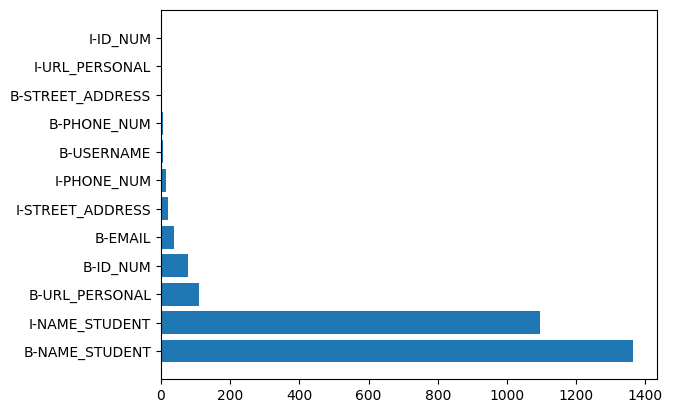

In [86]:
from collections import Counter
c = Counter()
df.apply(lambda line: c.update(line.labels), axis = 1)
c_pii = c.most_common()[1:]
c_key, c_val = zip(*c_pii)
plt.barh(c_key, c_val)
plt.show()

### Preprocessing

In [52]:
df_train, df_test = train_test_split(df, test_size=0.05)
dft = df_test.head(10)

In [99]:
test = df.head(5)

In [109]:
df.loc[:,'full_text'] = df.loc[:,'full_text'].replace('\\xa0', ' ', regex=True)

In [116]:
[tok for tok in df.iloc[4].tokens if tok != r'\xa0']

['Assignment',
 ':',
 '\xa0 ',
 'Visualization',
 '\xa0',
 'Reflection',
 '\xa0 ',
 'Submitted',
 '\xa0',
 'by',
 ':',
 '\xa0',
 'Nadine',
 'Born',
 '\xa0 ',
 'Course',
 ':',
 '\xa0 ',
 'Design',
 '\xa0',
 'Thinking',
 '\xa0',
 'for',
 '\xa0',
 'Innovation',
 '\xa0 \xa0 ',
 'Trail',
 '\xa0',
 'Challenge',
 ':',
 '\xa0',
 'To',
 '\xa0',
 'Build',
 '\xa0',
 'or',
 '\xa0',
 'Not',
 '\xa0',
 'to',
 '\xa0',
 'Build',
 '\xa0 \xa0 ',
 'An',
 '\xa0',
 'environmental',
 '\xa0',
 'charity',
 '\xa0',
 'wanted',
 '\xa0',
 'to',
 '\xa0',
 'conduct',
 '\xa0',
 'a',
 '\xa0',
 'fundraising',
 '\xa0',
 'campaign',
 '\xa0',
 'to',
 '\xa0',
 'raise',
 '\xa0',
 '$',
 '4',
 '\xa0',
 'million',
 '\xa0',
 'to',
 '\xa0',
 'build',
 '\xa0',
 'a',
 '\xa0 ',
 'public',
 '\xa0',
 'path',
 '\xa0',
 'in',
 '\xa0',
 'a',
 '\xa0',
 'busy',
 '\xa0',
 'tourist',
 '\xa0',
 'area',
 '\xa0',
 'of',
 '\xa0',
 'a',
 '\xa0',
 'small',
 '\xa0',
 'town',
 '\xa0',
 'in',
 '\xa0',
 'British',
 '\xa0',
 'Columbia',
 ',',
 '\xa0',

# Model


In [105]:
df.full_text.iloc[:]

0       Design Thinking for innovation reflexion-Avril...
1       Diego Estrada\n\nDesign Thinking Assignment\n\...
2       Reporting process\n\nby Gilberto Gamboa\n\nCha...
3       Design Thinking for Innovation\n\nSindy Samaca...
4       Assignment:  Visualization Reflection  Submitt...
                              ...                        
6802    EXAMPLE – JOURNEY MAP\n\nTHE CHALLENGE    My w...
6803    Why Mind Mapping?\n\nMind maps are graphical r...
6804    Challenge\n\nSo, a few months back, I had chos...
6805    Brainstorming\n\nChallenge & Selection\n\nBrai...
6806    Mind Mapping\n\nChallenge\n\nMy consulting tea...
Name: full_text, Length: 6807, dtype: object